In [24]:
import pandas as pd
import seaborn as sns

In [25]:
df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<AxesSubplot:xlabel='quality', ylabel='alcohol'>

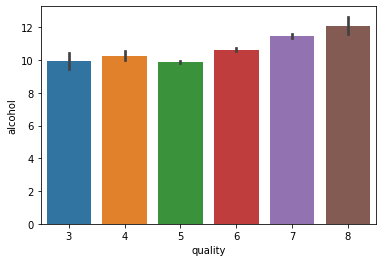

In [26]:
# As we can see, the quality score is between 3 and 8. Score above 6.5 will be considered as good quality.
sns.barplot(x = 'quality', y = 'alcohol', data = df)

In [27]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [28]:
# Normalizing quality feature. 0 -> bad , 1 -> good
from sklearn.preprocessing import LabelEncoder
label_quality = LabelEncoder()
df['quality'] = label_quality.fit_transform(df['quality'])

/home/alpo/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    1382
1     217
Name: quality, dtype: int64

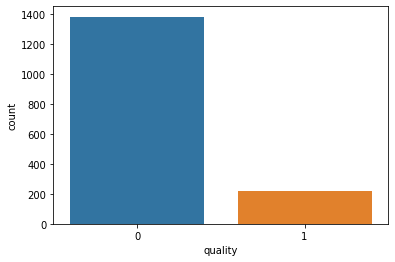

In [29]:
sns.countplot(df['quality'])
df['quality'].value_counts()

In [30]:
# Creating training and test sets.
X = df.drop('quality', axis = 1)
y = df['quality']

In [31]:
# Splitting dataset into train and test sets(80% training data, 20% test data)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 333)

In [37]:
#Training and Testing with Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_result = rfc.predict(X_test)

In [38]:
# RFC Results: Confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(classification_report(y_test, rfc_result))
print(confusion_matrix(y_test, rfc_result))
rfc_acc = accuracy_score(y_test, rfc_result)
print("Accuracy(%): " + str(rfc_acc * 100))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       273
           1       0.72      0.45      0.55        47

    accuracy                           0.89       320
   macro avg       0.82      0.71      0.75       320
weighted avg       0.88      0.89      0.88       320

[[265   8]
 [ 26  21]]
Accuracy(%): 89.375


In [39]:
# Training and Testing with Support Vector Machine
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
svc_result = svc.predict(X_test)

In [40]:
print(classification_report(y_test, svc_result))
print(confusion_matrix(y_test, svc_result))
svc_acc = accuracy_score(y_test, svc_result)
print("Accuracy(%): " + str(svc_acc * 100))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       273
           1       0.00      0.00      0.00        47

    accuracy                           0.85       320
   macro avg       0.43      0.50      0.46       320
weighted avg       0.73      0.85      0.79       320

[[273   0]
 [ 47   0]]
Accuracy(%): 85.3125


/home/alpo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/alpo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/alpo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
